
# Project: Investigate The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I am going to investigate and analyze The Movie Database and communicate my findings. This Dataset includes data of 10,000 films such as rating, cast, genres, budget, revenues, etc. This data is provided by Kaggle and collected from The Movie Database (TMDb) which is a popular user editable database for movies and TV shows.

Questions to be answered:

1 - What is the distribution of movies runtime?

2 - What is the longest, shortest and the average runtime of all movies?

3 - How movies runtime changes over years?

4 - What is the distibution of directors based on number of directed movies?

5 - Which director has appeared the most?

6 - What are the most popular genres? 

7 - Which months have seen the maximum releases?

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime as dt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [20]:
dat=pd.read_csv('tmdb-movies.csv')  #reading data from the CSV file

print(dat.head(3)) # printing the first 3 rows with the header


       id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline      ...       \
0           The park is open.      ...        
1          What a Lovely Day.      ...        
2  One Choice Can Destroy You   

In [3]:
dat.shape # priting the number of rows and columns

(10866, 21)

In [4]:
dat.dtypes # printing the data type of each attribute

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning 

In this step I will clean the dataset by removing the columns that I do not need in the analysis which are:
[id, imdb_id, popularity, budget, original_title, homepage, director, tagline, keywords, overview, production_companies, vote_count, vote_average, release_year, budget_adj, revenue_adj]. Moreover, I will convert the release_date into DateTime format and remove any duplicates, missing , and zero values.

In [21]:
#deleting the columns from the dataset
dat.drop(['id', 'imdb_id','budget','revenue','original_title' , 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average','budget_adj', 'revenue_adj'], axis = 1, inplace = True)

#preview the new dataset
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
popularity      10866 non-null float64
director        10822 non-null object
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
release_year    10866 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.4+ KB


In [22]:
dat['release_date']= pd.to_datetime(dat['release_date']) #convert the release_date into DateTime format
dat.info() #preview the type after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
popularity      10866 non-null float64
director        10822 non-null object
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null datetime64[ns]
release_year    10866 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 509.4+ KB


In [7]:
dat.drop_duplicates(inplace = True) #removing duplicates
dat.shape #preview number of rows after deleting duplicates 

(10865, 6)

In [8]:
dat.dropna(inplace=True) #removing missing values
dat.shape #preview number of rows after deleting missing values 

(10800, 6)

In [9]:
dat.isin([0]).sum() #checking for zero values
dat.drop(dat[ dat['runtime'] == 0 ].index, axis=0 , inplace = True) #removing zero vlaues from runtime
dat.isin([0]).sum()
dat.shape #preview number of rows after deleting zero values 

(10772, 6)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What is the distribution of movies runtime?

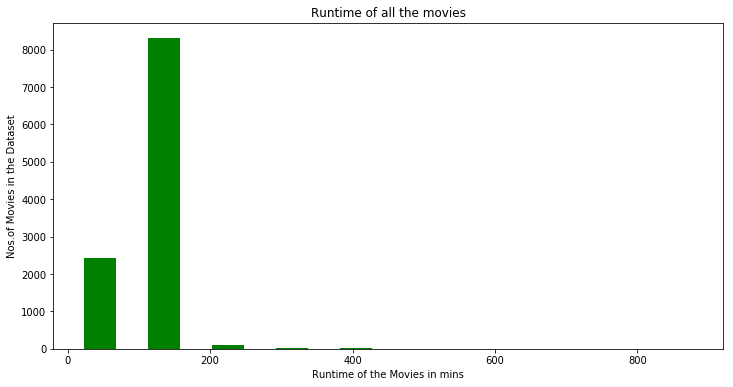

In [43]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(12,6))

#On x-axis 
plt.xlabel('Runtime of the Movies in mins')
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset')
#Name of the graph
plt.title('Runtime of all the movies')

#giving a histogram plot
plt.hist(dat['runtime'], rwidth = 0.5, bins =10,color='g')
#displays the plot
plt.show()

### Research Question 2 - What is the longest, shortest and the average runtime of all movies? 

The longest runtime is 15 hours

In [11]:
print("%.2f" % dat['runtime'].max()) #calculating the longest runtime

900.00


The shortest runtime is 2 minutes

In [12]:
print("%.2f" % dat['runtime'].min()) #calculating the shortest runtime

2.00


The average runtime is 1 hour and 42 minutes

In [13]:
print("%.2f" % dat['runtime'].mean()) #calculating the average runtime

102.46


### Research Question 3  - What is the distibution of directors based on number of directed movies?


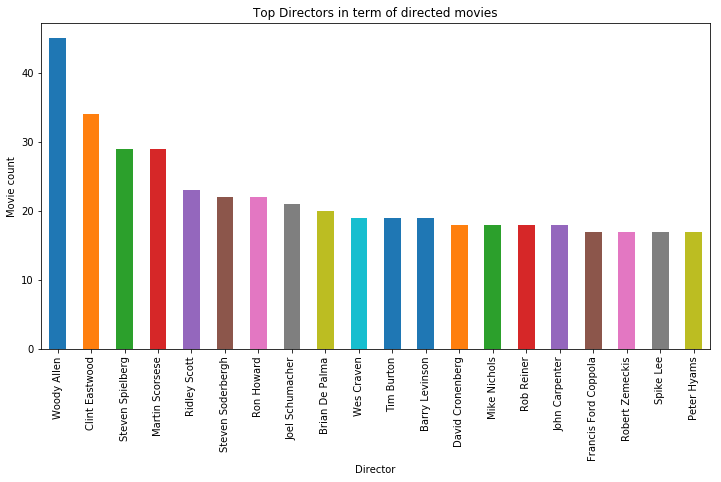

In [42]:
dr = dat['director'].value_counts() #calculating the appearance of each director
dr=dr[0:20]
dr.plot(kind='bar',figsize=(12,6));
plt.title('Top Directors in term of directed movies',)
plt.xlabel('Director')
plt.ylabel('Movie count');

### Research Question 4  - Who is the director who directed most movies is?

The director who directed most movies is:

In [15]:
dr.idxmax() #find the director with max appearance

'Woody Allen'

### Research Question 5  - What are the most popular genres? 


The genres of the movies with highest populairty are:

Text(0,0.5,'Popularity')

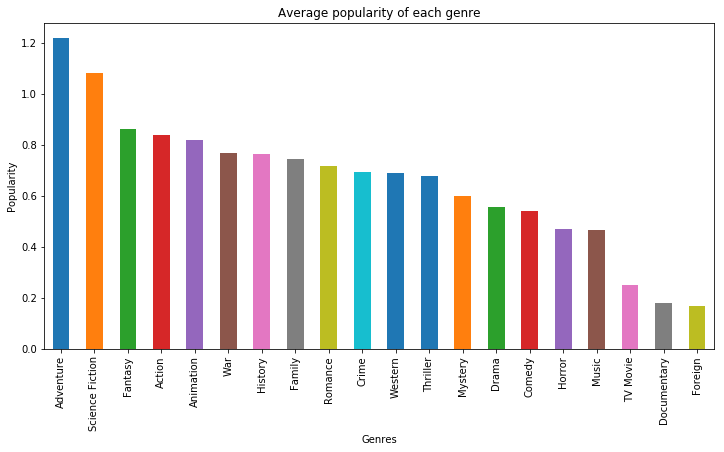

In [16]:
gen=dat
gen['genres'] = dat['genres'].apply(lambda x: x.split("|")[0]) #dealing with the multiple values in the genres column
gen=gen.groupby('genres')['popularity'].mean() #calcualting the avergae popularity for each genre
gen.sort_values(ascending=False).plot(x='genres',y='popularity',kind='bar',figsize=(12,6)) #plotting the results
plt.title('Average popularity of each genre')
plt.xlabel('Genres')
plt.ylabel('Popularity')


The graph shows that the Adventure is the most popular genre during the period from 1966 to 2015

### Research Question 6 - Which months have seen the maximum releases?

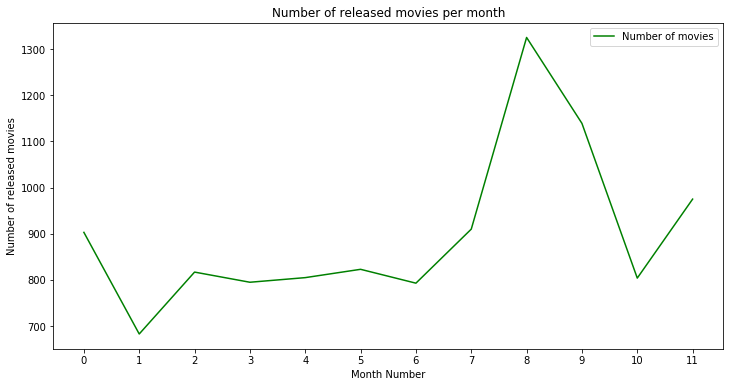

In [17]:
dat['release_month']=dat['release_date'].dt.month #creating a new column for the release month and extract values from the release date
rels_month= dat.release_month.value_counts().sort_index() #counting the releases for each month
dat2=pd.DataFrame() #creating another table
dat2['Months']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] #adding months
dat2['Number of movies']=rels_month.get_values() #adding count columns and import the  values from the dataset
dat2.plot(x='Months',y='Number of movies',color='green',figsize=(12,6)) #plotting results
plt.title('Number of released movies per month');
plt.ylabel('Number of released movies');
plt.xlabel('Month Number');
plt.xticks(np.arange(len(dat2.index)), dat2.index)
plt.show()

I can see from the graph that Augest has the highest number of released movies throughout the years 1966-2015.

<a id='conclusions'></a>
## Conclusions

after observing the results of the investigation I conclude the following:

- Movies runtime:
  - The longest runtime is 11 hours and 45 minutes
  - The shortest runtime is 15 minutes
  - The average runtime is 1 hours and 47 minutes

- The director who directed most movies in the dataset is Woody Allen.

- The most popular movie genre is the Adventure. 

- The month with highest number of movie releases is Augest.

## limitations
The Dataset includes many columns which makes it harder to understand and specify needed ones and there is no clear description that illustartes their meaning and facilitates differentiation between them, for example the difference between revenue and revenue_adj columns was unclear to me. 
also, dealing with multivalued cells was challenging.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0